In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
  
# fetch dataset 
df = pd.read_csv("C:\\Users\\shree\\OneDrive\\Desktop\\The Data Science Course 2021 - All Resources\\My\\HeartDiseasePrediction_DecisionTrees\\heart+disease\\processed.cleveland.data", header=None) 
  
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.columns = ['age',
              'sex',
              'cp',
              'trestbps',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'target'
]

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Feature Description (Cleveland)

This dataset consists of 14 key features used to predict the presence of heart disease in patients. Below is a description of each:

| Feature      | Description |
|--------------|-------------|
| **age**      | Age of the patient in years |
| **sex**      | Sex of the patient (1 = male, 0 = female) |
| **cp**       | Chest pain type:<br>1 = typical angina<br>2 = atypical angina<br>3 = non-anginal pain<br>4 = asymptomatic |
| **trestbps** | Resting blood pressure (in mm Hg on admission) |
| **chol**     | Serum cholesterol in mg/dl |
| **fbs**      | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) |
| **restecg**  | Resting electrocardiographic results:<br>0 = normal<br>1 = ST-T wave abnormality<br>2 = left ventricular hypertrophy |
| **thalach**  | Maximum heart rate achieved during test |
| **exang**    | Exercise-induced angina (1 = yes; 0 = no) |
| **oldpeak**  | ST depression induced by exercise relative to rest |
| **slope**    | Slope of the peak exercise ST segment:<br>1 = upsloping<br>2 = flat<br>3 = downsloping |
| **ca**       | Number of major vessels (0–3) colored by fluoroscopy |
| **thal**     | Thalassemia:<br>3 = normal<br>6 = fixed defect<br>7 = reversible defect |
| **target**   | Presence of heart disease:<br>0 = no disease<br>1, 2, 3, 4 = increasing severity of disease |



In [5]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


In [6]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [7]:
df['ca'].unique()


array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.loc[(df['ca']=='?') | (df['thal']=='?')] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


### Dealing with Missing Values

We can remove these 6 rows as they account for just 2% of the dataset

In [11]:
df_no_mv = df.loc[(df['ca']!='?') & (df['thal']!='?')] 

In [12]:
df_no_mv.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297,297,297.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174,164,NaN
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,NaN,NaN,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,NaN,NaN,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


### Split into inputs (x) and targets (y)

In [13]:
x = df_no_mv.iloc[:,:13]
x.shape

(297, 13)

In [14]:
y = df_no_mv['target'].copy()
y.shape

(297,)

In [15]:
type(x)

pandas.core.frame.DataFrame

In [16]:
type(y)

pandas.core.series.Series

### Encoding Categorical Feature
Applying one-hot encoding

features encoded: 

- cp
- restecg
- slope
- thal

In [17]:
x_enc = pd.get_dummies(x,columns=['cp','restecg','slope','thal'])
x_enc.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In this project, we just want to predict if a person has heart disease or not 

So, for target feature, we just want '0' or '1' 

In [18]:
y.unique()

array([0, 2, 1, 3, 4])

In [19]:
y_index = y>0
y[y_index] = 1
y.unique()


array([0, 1])

In [20]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64

#### Split data into train-test

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_enc, y, random_state = 42)

#### Building the classification tree

In [22]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

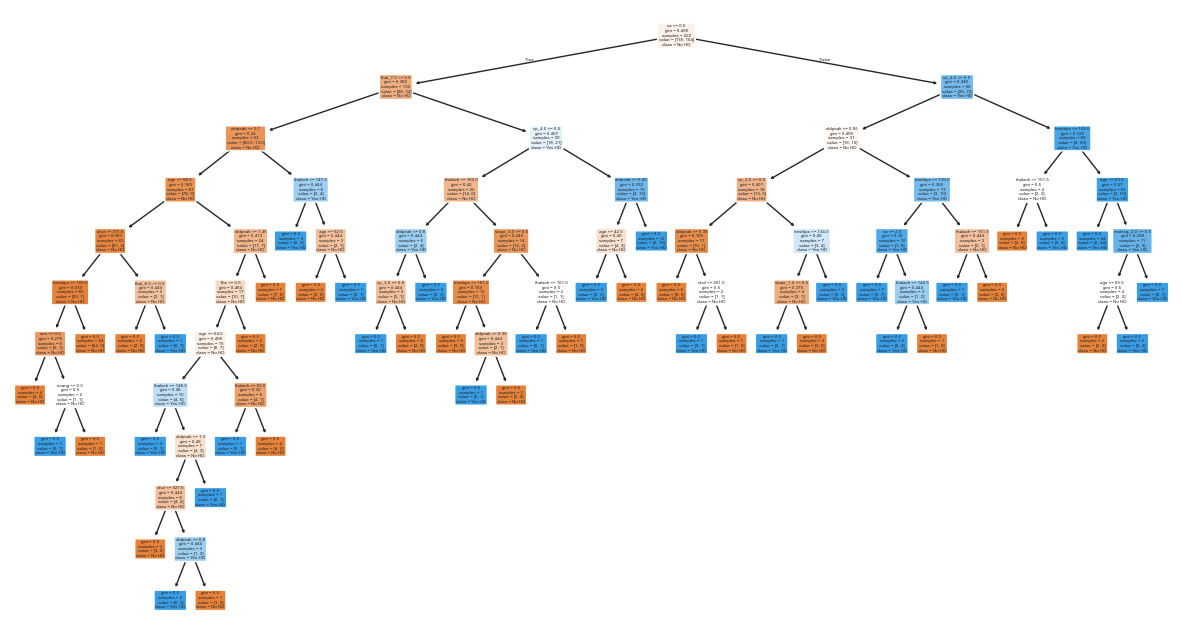

In [23]:
fig, ax = plt.subplots(figsize=(15, 8))  # Use plt.subplots instead of plt.figure
plot_tree(
    clf,
    filled=True,
    rounded=True,
    class_names=['No HD', 'Yes HD'],
    feature_names=x_enc.columns,
    ax=ax  # Attach the tree to the current axis
)
fig.savefig("decision_tree_org.png", dpi=300, bbox_inches='tight')
plt.show()



In [24]:
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

#### Checking performance on Testing Data

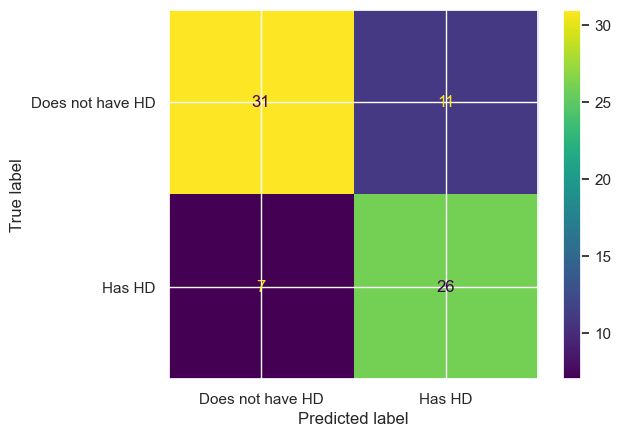

In [25]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    x_test,
    y_test,
    display_labels = ['Does not have HD','Has HD']
)

In [26]:
Does_not_have_CorrectPrediction = (31/(31+11))*100 
Does_not_have_IncorrectPredicted = (11/(31+11))*100

Have_CorrectPrediction = (26/(26+7)*100)
Have_IncorrectPrediction = (7/(26+7)*100)

In [27]:
print('Does_not_have_CorrectPrediction: ',Does_not_have_CorrectPrediction)
print('Does_not_have_IncorrectPredicted: ',Does_not_have_IncorrectPredicted)
print('Have_CorrectPrediction: ',Have_CorrectPrediction)
print('Have_IncorrectPrediction: ',Have_IncorrectPrediction)

Does_not_have_CorrectPrediction:  73.80952380952381
Does_not_have_IncorrectPredicted:  26.190476190476193
Have_CorrectPrediction:  78.78787878787878
Have_IncorrectPrediction:  21.21212121212121


We can definately do better,

One thing might be that this tree might have overfitted the training dataset, the tree is huge right now!

We will prune the tree to solve the overfitting issue

### Pruning the tree (Cost complexity Pruning)

In [28]:
path = clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha = ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)
    
    

Plotting accuracy of the trees

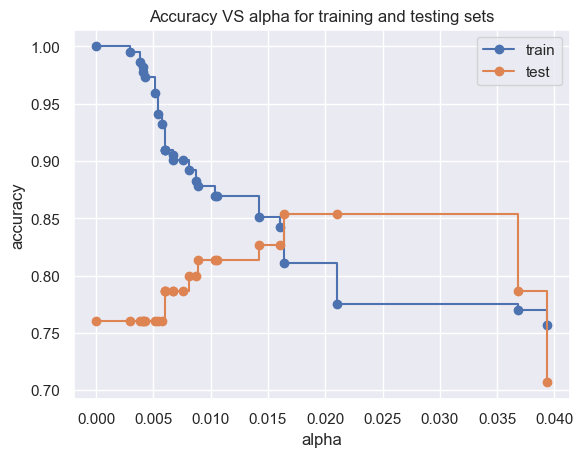

In [29]:
train_scores = [clf.score(x_train,y_train) for clf in clfs]
test_scores = [clf.score(x_test,y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title("Accuracy VS alpha for training and testing sets") 
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post") 
ax.plot (ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post") 
ax.legend()
plt.show()


accuracy of testing data hits max. when alpha is about 0.016

### Cross-validation for choosing best alpha

<Axes: xlabel='tree'>

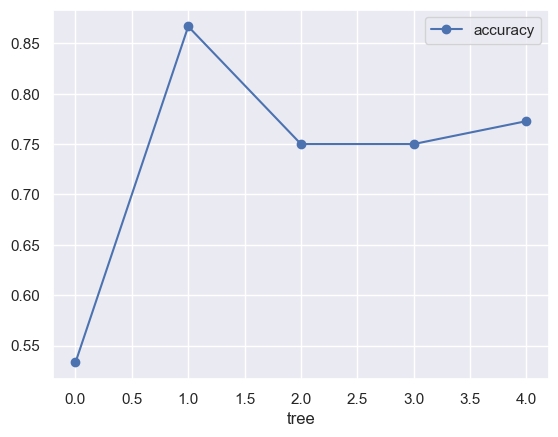

In [30]:
clf = DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)

scores = cross_val_score(clf,x_train,y_train,cv=5)
df2 = pd.DataFrame(data={'tree': range(5), 'accuracy':  scores})

df2.plot(x='tree',y='accuracy', marker = 'o', linestyle = '-')

Graph above shows that using different Training and Testing data with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to datasets. So, instead of picking a single Training dataset and single Testing dataset, let's use cross validatibn to find the optimal value for ccp_alpha .

In [31]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf,x_train,y_train, cv =5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std'])


<Axes: xlabel='alpha'>

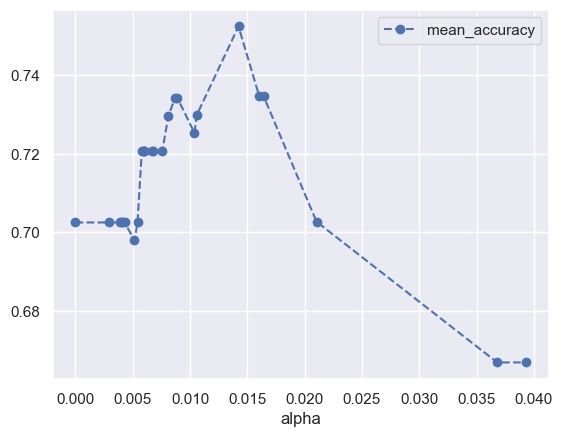

In [32]:
alpha_results.plot(
    x='alpha',
    y='mean_accuracy',
    marker='o',
    linestyle='--'
    
)

We can see that instead of setting alpha = 0.016, we need to set it something closer to 0.014

In [33]:
final_alpha = alpha_results [(alpha_results['alpha'] > 0.014) &
(alpha_results['alpha'] < 0.015)] ['alpha']
ideal_alpha = float(final_alpha)

C:\Users\shree\AppData\Local\Temp\ipykernel_23888\1235218911.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_alpha = float(final_alpha)


### Lets re-build Decision tree using the best calculated alpha (0.014225)

In [34]:
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha = ideal_alpha)
clf_pruned.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

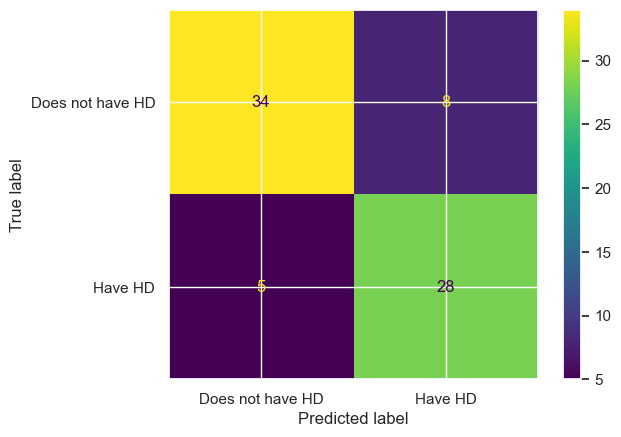

In [35]:
ConfusionMatrixDisplay.from_estimator(clf_pruned,x_test,y_test,display_labels=['Does not have HD', 'Have HD'])

In [36]:
Pruned_Does_not_have_CorrectPrediction = (34/(34+8))*100 
Pruned_Does_not_have_IncorrectPredicted = (8/(34+8))*100

Pruned_Have_CorrectPrediction = (28/(28+5)*100)
Pruned_Have_IncorrectPrediction = (5/(28+5)*100)

In [37]:
print('Does_not_have_CorrectPrediction: ',Does_not_have_CorrectPrediction)
print('Does_not_have_IncorrectPredicted: ',Does_not_have_IncorrectPredicted)
print('Have_CorrectPrediction: ',Have_CorrectPrediction)
print('Have_IncorrectPrediction: ',Have_IncorrectPrediction)
print('--------------------------------------------------------------------------------------------')
print('Pruned_Does_not_have_CorrectPrediction: ',Pruned_Does_not_have_CorrectPrediction)
print('Pruned_Does_not_have_IncorrectPredicted: ',Pruned_Does_not_have_IncorrectPredicted)
print('Pruned_Have_CorrectPrediction: ',Pruned_Have_CorrectPrediction)
print('Pruned_Have_IncorrectPrediction: ',Pruned_Have_IncorrectPrediction)

Percent_improve_Does_not_have_HD =  Pruned_Does_not_have_CorrectPrediction - Does_not_have_CorrectPrediction
Percent_improve_Have_HD = Pruned_Have_CorrectPrediction - Have_CorrectPrediction
print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')

print(Percent_improve_Does_not_have_HD)
print(Percent_improve_Have_HD)


Does_not_have_CorrectPrediction:  73.80952380952381
Does_not_have_IncorrectPredicted:  26.190476190476193
Have_CorrectPrediction:  78.78787878787878
Have_IncorrectPrediction:  21.21212121212121
--------------------------------------------------------------------------------------------
Pruned_Does_not_have_CorrectPrediction:  80.95238095238095
Pruned_Does_not_have_IncorrectPredicted:  19.047619047619047
Pruned_Have_CorrectPrediction:  84.84848484848484
Pruned_Have_IncorrectPrediction:  15.151515151515152
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
7.142857142857139
6.060606060606062


So , we have a pruned-tree which is better than the full-sized tree at classsifying patients

We have 7 and 6 percent improvments in prediction accurarcies

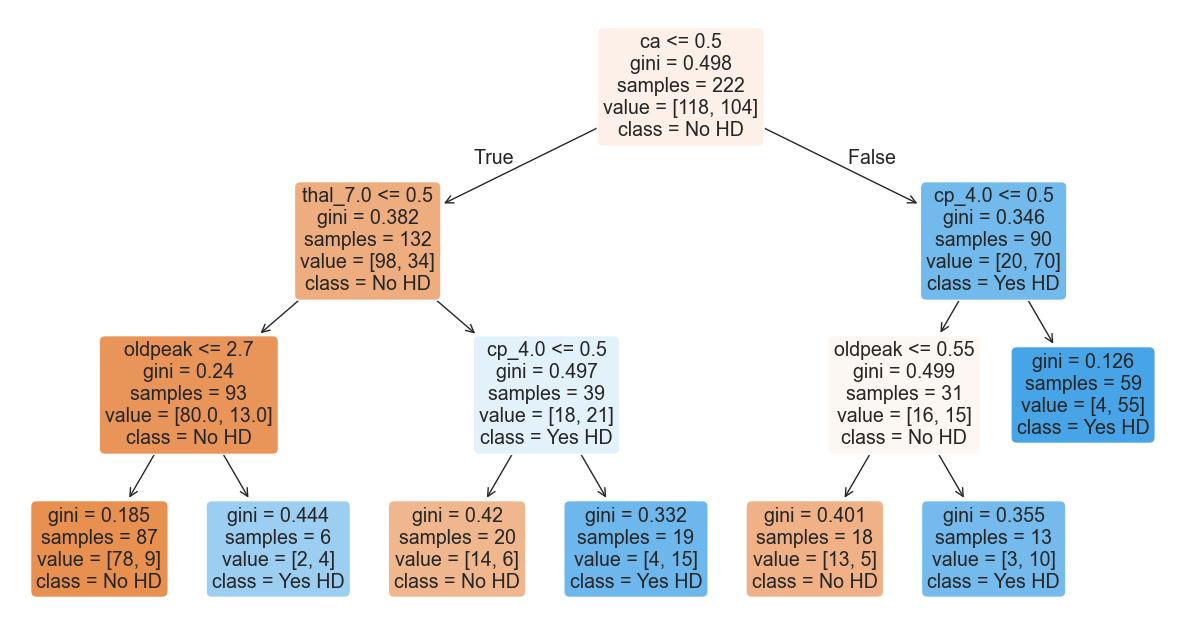

In [38]:
fig, ax = plt.subplots(figsize=(15, 8))  # Use plt.subplots instead of plt.figure
plot_tree(
    clf_pruned,
    filled=True,
    rounded=True,
    class_names=['No HD', 'Yes HD'],
    feature_names=x_enc.columns,
    ax=ax  # Attach the tree to the current axis
)
fig.savefig("decision_tree_pruned.png", dpi=300, bbox_inches='tight')
plt.show()


A Much smaller tree, with greater accuracy!